# Выпускная квалификационная работа по курсу «Data Science»

Структурно ВКР состоит из двух частей -- аналитической и практической:

1. ***Аналитическая часть.***

  1.1. Постановка задачи.<br>
  1.2. Описание используемых методов.<br>
  1.3. Разведочный анализ данных.
  
  
2. ***Практическая часть.***

  2.1. Предобработка данных. Удаление шумов, нормализация и т.д.<br>
  2.2. Разработка и обучение модели. Графики распределения для каждого признака до и после нормализации, их максимальные и минимальные значения).<br>
  2.3. Тестирование модели. Ошибка каждой модели на тренировочной и тестирующей части выборки. Обосновывание выбора модели.<br>
  2.4. Реализация нейронной сети, рекомендующей соотношение матрица-наполнитель.<br>
  2.5. Разработка приложения. Его функционал приложения и краткая инструкция использования.<br>
  2.6. Создание удаленного репозитория и загрузка результатов работы на него.

### 1.1. Постановка задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: **Прогнозирование конечных свойств новых материалов (композиционных материалов).**
> 
> **Описание:** 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).
>
>**Актуальность:** Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.


### 1.2. Описание используемых методов.

Построение моделей машинного обучения для прогноза модуля упругости при растяжении и прочности при растяжении является эффективным и быстрым способом прогнозирования свойств материалов. Эти модели используются для анализа больших объемов данных и выявления закономерностей в поведении материалов.

Для прогнозирования модуля упругости и прочности при растяжении, модели машинного обучения используют различные алгоритмы, такие как регрессия, случайный лес, градиентный бустинг и нейронные сети. Эти алгоритмы позволяют выявлять связи между различными свойствами материалов и прогнозировать их поведение в различных условиях.

## Возможно: описание регресии, случайного леса, бустинга.

### 1.3. Разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонки получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). По условиям задачи необходимо сделать объединение  файлов по индексу тип объединения INNER.

In [4]:
# Импортирем необходимые библиотеки

import numpy as np                                     # Библиотека для работы с массивами
import pandas as pd                                    # Библиотека для работы с таблицами
import matplotlib.pyplot as plt                        # Библиотека для визуализации данных
import seaborn as sns                                  # Библиотека для визуализации данных
from sklearn.preprocessing import OrdinalEncoder       # Кодирование категориальных переменных
from sklearn.preprocessing import StandardScaler       # Стандартизация числовых переменных
from sklearn.compose import ColumnTransformer          # Объединение преобразований для признаков
from sklearn.model_selection import train_test_split   # Разбиение данных на тренировочный и тестовый наборы
from sklearn.model_selection import KFold              # Кросс-валидация
from sklearn.model_selection import cross_val_score    # Кросс-валидация
from sklearn.model_selection import cross_validate     # Кросс-валидация
from sklearn.model_selection import GridSearchCV       # Подбор параметров модели
from sklearn.base import BaseEstimator                 # Базовый класс для создания пользовательских оценок
from sklearn.dummy import DummyRegressor               # Базовая модель регрессии
from sklearn.linear_model import LinearRegression      # Линейная регрессия
from sklearn.linear_model import Ridge                 # Ридж-регрессия
from sklearn.linear_model import Lasso                 # Лассо-регрессия
from sklearn.svm import SVR                            # Метод опорных векторов
from sklearn.neighbors import KNeighborsRegressor      # Метод ближайших соседей
from sklearn.tree import DecisionTreeRegressor         # Дерево решений
from sklearn.ensemble import RandomForestRegressor     # Случайный лес
from sklearn.ensemble import GradientBoostingRegressor # Градиентный бустинг
from sklearn import metrics                            # Метрики для оценки качества моделей
import pickle                                          # Библиотека для сохранения и загрузки моделей

In [ ]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

In [1]:
# Определим RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [6]:
# Загрузим исходные данные из файлов X_bp и X_nup, проверим их размерность
X_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
X_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)
print(f"X_bp содержит {X_bp.shape[1]} признаков и {X_bp.shape[0]} строк.")
print(f"X_nup содержит {X_nup.shape[1]} признака и {X_nup.shape[0]} строк.")

X_bp содержит 10 признаков и 1023 строк.
X_nup содержит 3 признака и 1040 строк.


Рассмотрим признаки датасетов

In [7]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

,X_bp признаки
0,Соотношение матрица-наполнитель
1,"Плотность, кг/м3"
2,"модуль упругости, ГПа"
3,"Количество отвердителя, м.%"
4,"Содержание эпоксидных групп,%_2"
5,"Температура вспышки, С_2"
6,"Поверхностная плотность, г/м2"
7,"Модуль упругости при растяжении, ГПа"
8,"Прочность при растяжении, МПа"
9,"Потребление смолы, г/м2"


In [8]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

,X_nup признаки
0,"Угол нашивки, град"
1,Шаг нашивки
2,Плотность нашивки


По условиям датасеты необходимо объединить типом INNER. В результирующий датасет не попадут 17 строк X_nup.

In [10]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
print(f"Объединенный датасет содержит {df.shape[1]} признаков и {df.shape[0]} строк.")

Объединенный датасет содержит 13 признаков и 1023 строк.


In [11]:
# Сохраним объединенные данные в csv
df.to_csv('data/df_merged.csv', sep=',', encoding='utf-8')

In [12]:
# Посмотрим типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Все признаки имеют тип float64 (нет типа "object") - значит, в столбцах содержатся только числа.

In [13]:
# Проверим на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

Поскольку датасет подготовлен, отсутствие пропусков и значений ошибочных типов не удивляет.

In [14]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [15]:
# Посмотрим описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

,count,mean,std,min,25%,50%,75%,max,median
Соотношение матрица-наполнитель,1023.0000,2.9304,0.9132,0.3894,2.3179,2.9069,3.5527,5.5917,2.9069
"Плотность, кг/м3",1023.0000,1975.7349,73.7292,1731.7646,1924.1555,1977.6217,2021.3744,2207.7735,1977.6217
"модуль упругости, ГПа",1023.0000,739.9232,330.2316,2.4369,500.0475,739.6643,961.8125,1911.5365,739.6643
"Количество отвердителя, м.%",1023.0000,110.5708,28.2959,17.7403,92.4435,110.5648,129.7304,198.9532,110.5648
"Содержание эпоксидных групп,%_2",1023.0000,22.2444,2.4063,14.2550,20.6080,22.2307,23.9619,33.0000,22.2307
"Температура вспышки, С_2",1023.0000,285.8822,40.9433,100.0000,259.0665,285.8968,313.0021,413.2734,285.8968
"Поверхностная плотность, г/м2",1023.0000,482.7318,281.3147,0.6037,266.8166,451.8644,693.2250,1399.5424,451.8644
"Модуль упругости при растяжении, ГПа",1023.0000,73.3286,3.1190,64.0541,71.2450,73.2688,75.3566,82.6821,73.2688
"Прочность при растяжении, МПа",1023.0000,2466.9228,485.6280,1036.8566,2135.8504,2459.5245,2767.1931,3848.4367,2459.5245
"Потребление смолы, г/м2",1023.0000,218.4231,59.7359,33.8030,179.6275,219.1989,257.4817,414.5906,219.1989


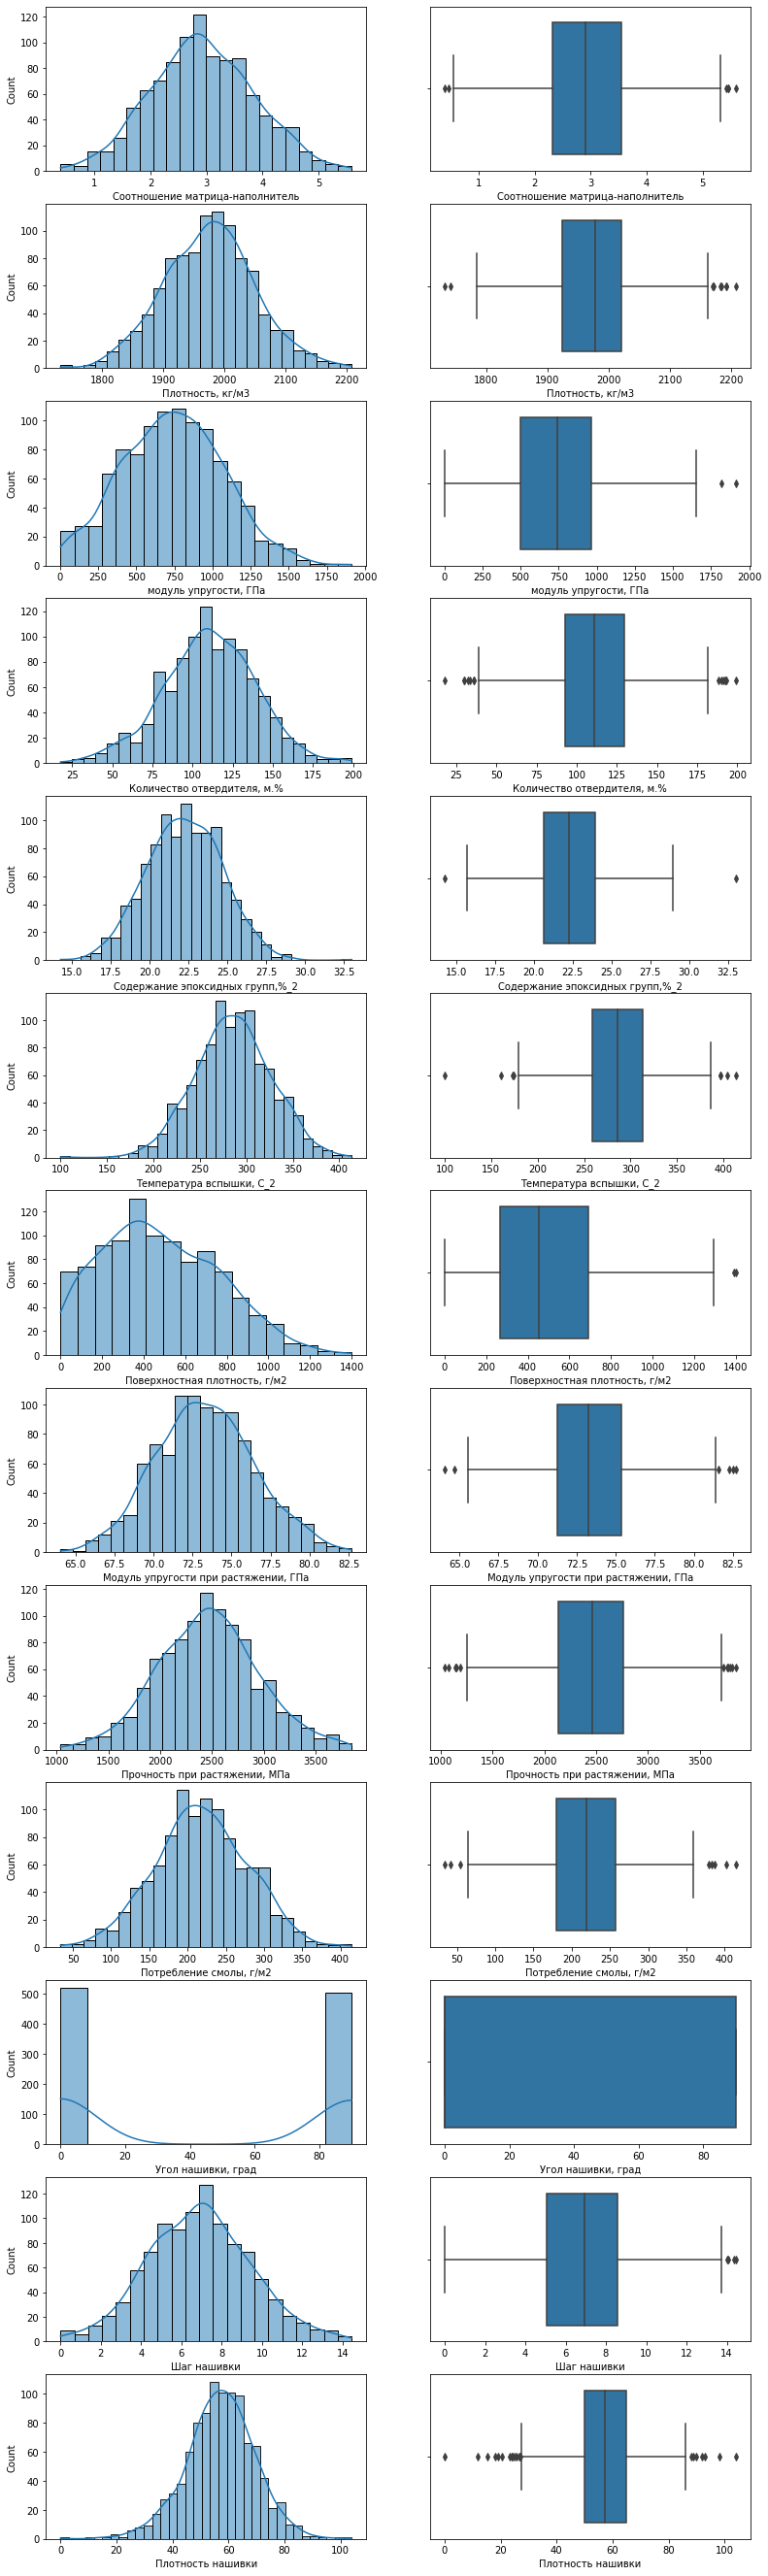

In [16]:
# Построим гистограммы распределения переменных и диаграммы ящика с усами
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения.

На ящиках с усами видно выбросы.

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.

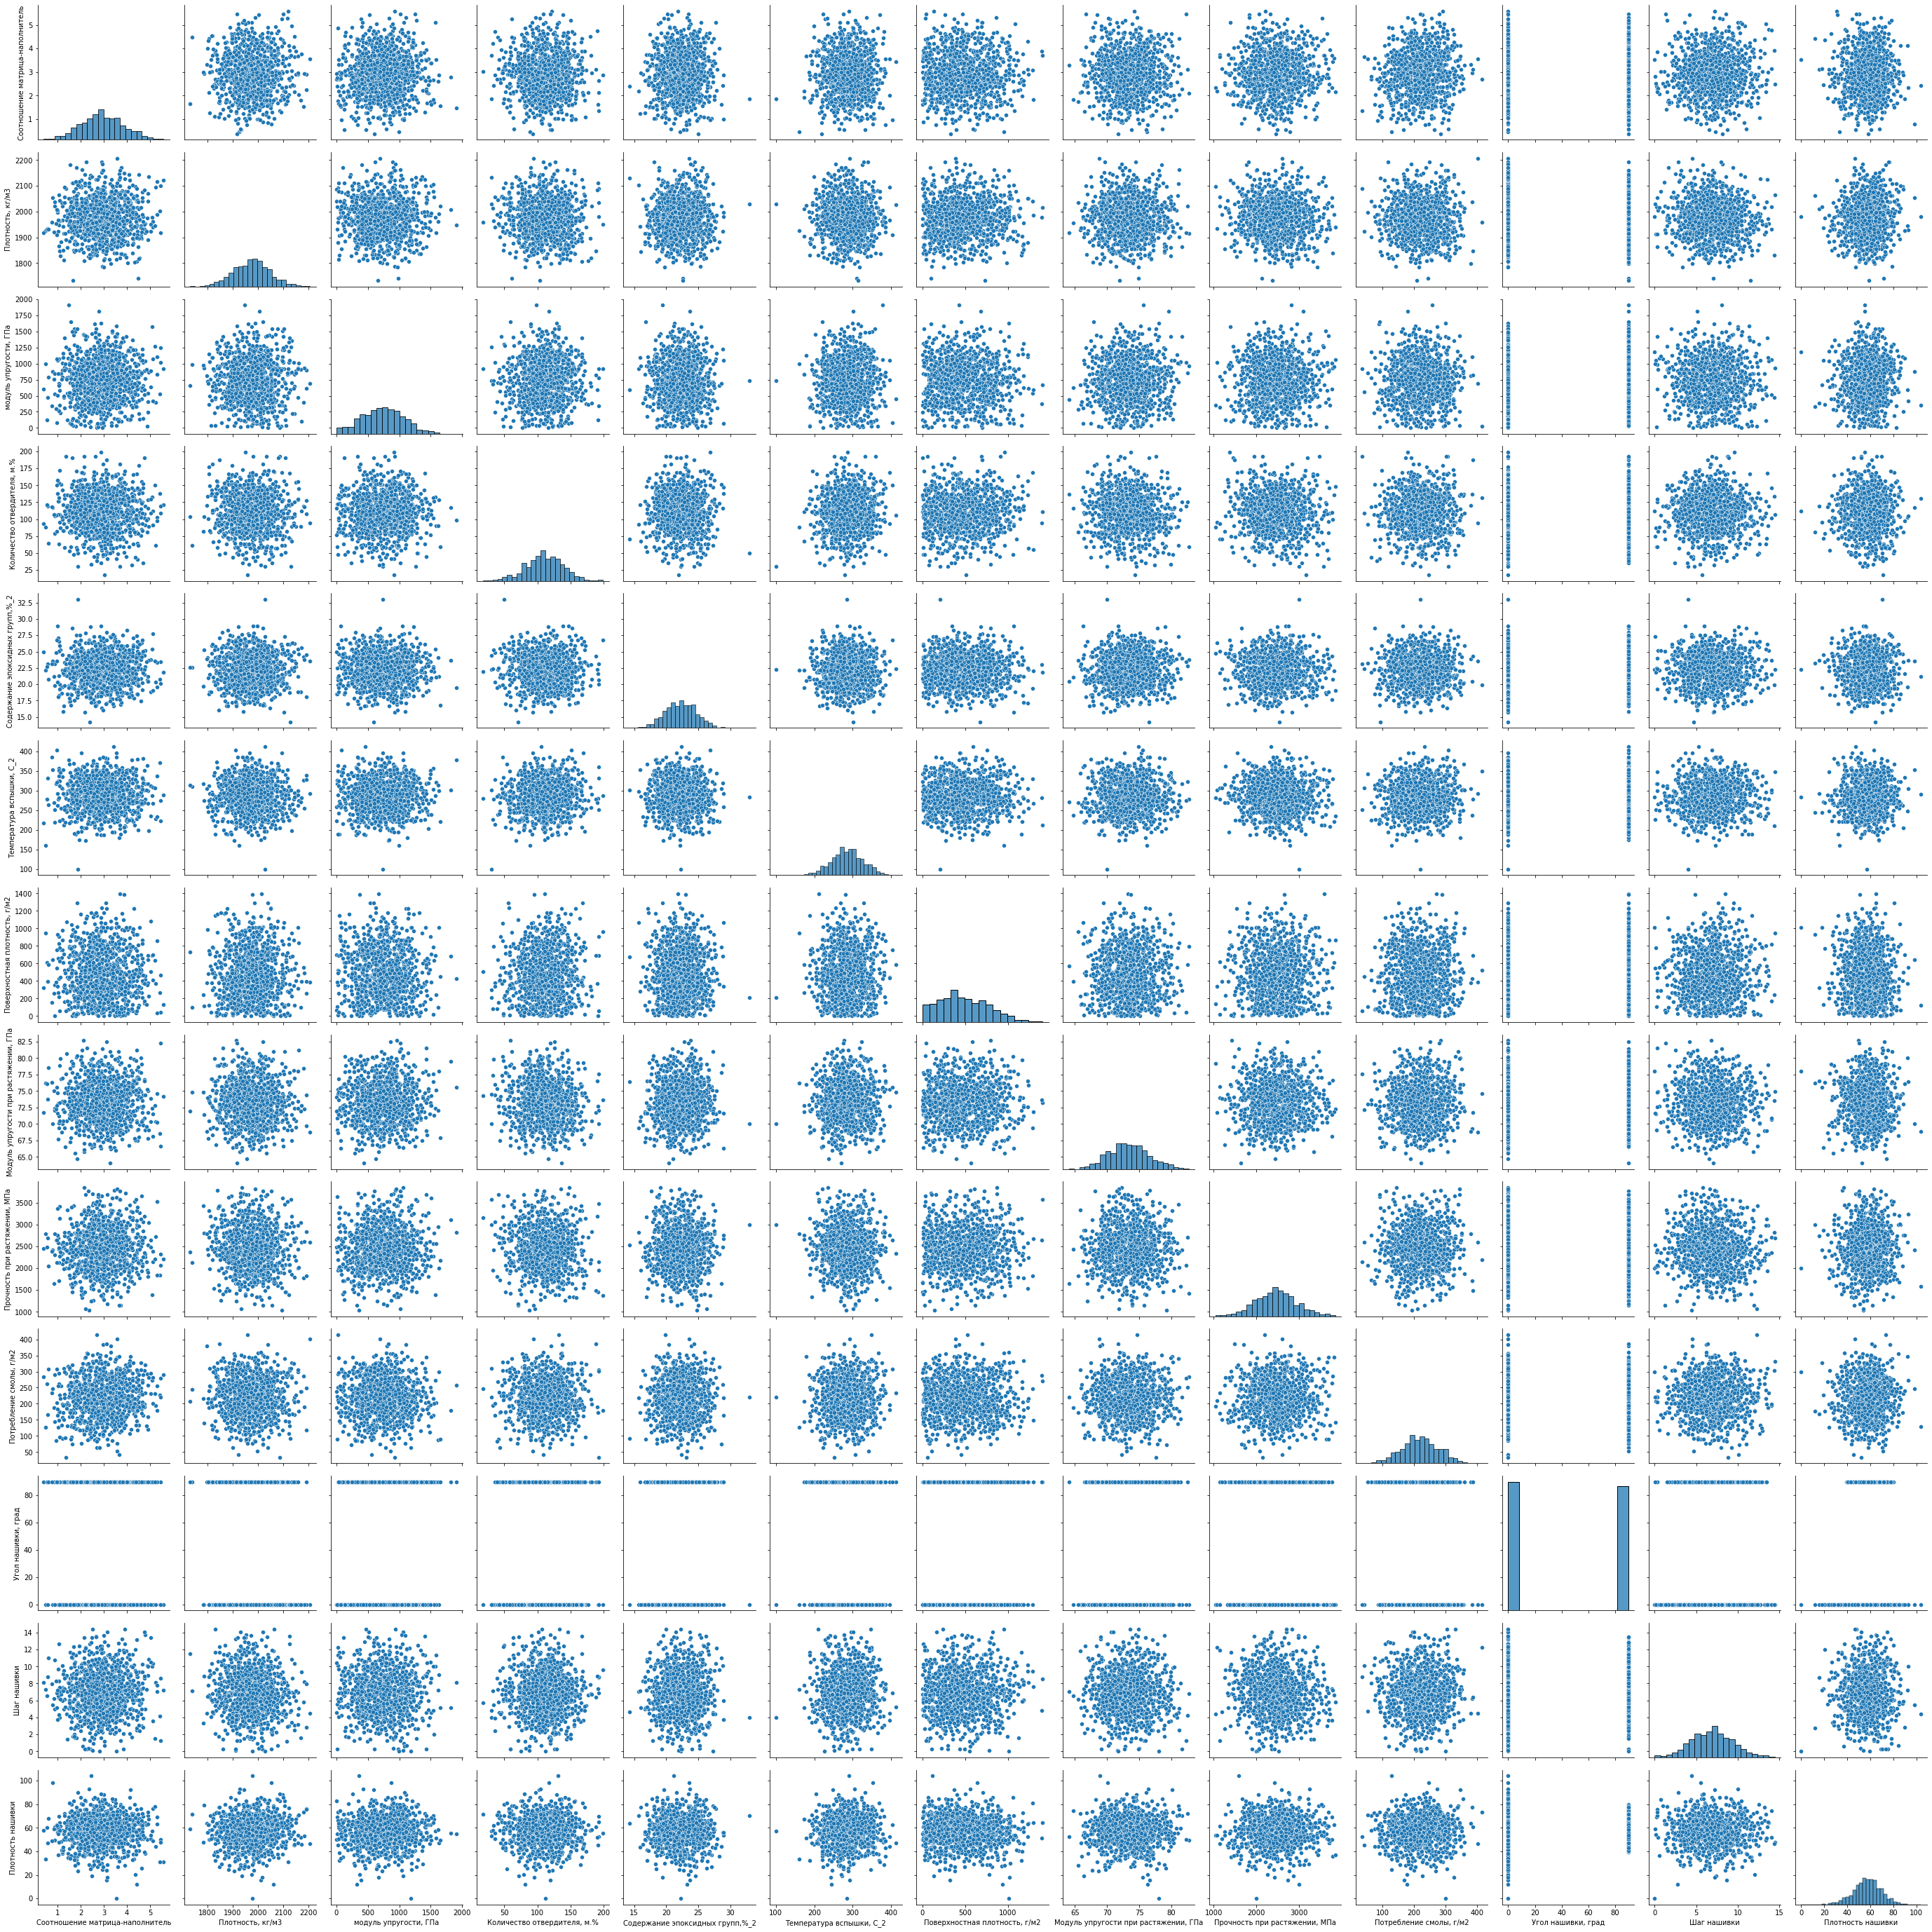

In [19]:
# Построим попарные графики рассеяния точек
sns.pairplot(df, height=3);

По графикам видно, что в датасете есть выбросы: некоторые точки стоят очень далеко от общего облака.
Далее избавимся от них.

### 2.1. Предобработка данных

Предобработка данных - это процесс подготовки и очистки датасета перед использованием его в алгоритмах машинного обучения. Этот процесс включает в себя несколько шагов:
На данном этапе мы избавимся от выбросов.
Выбросы могут исказить результаты машинного обучения, поэтому необходимо их идентифицировать и обработать. Это может включать в себя удаление выбросов или замену их средними или медианными значениями.

Существует несколько методов поиска выбросов в датасете:

1. Метод межквартильного расстояния (IQR) — основан на медиане и квартилях распределения признака. Выбросами считаются значения, лежащие за пределами интервала $[Q_1 - k \cdot IQR, Q_3 + k \cdot IQR]$, где $Q_1$ и $Q_3$ — первый и третий квартили распределения, $IQR = Q_3 - Q_1$ — межквартильный размах, а $k$ — коэффициент, определяющий ширину интервала.


2. Метод стандартных отклонений — основан на стандартном отклонении распределения признака. Выбросами считаются значения, лежащие за пределами интервала $[\mu - k \cdot \sigma, \mu + k \cdot \sigma]$, где $\mu$ и $\sigma$ — среднее и стандартное отклонение распределения, а $k$ — коэффициент, определяющий ширину интервала.


3. Метод DBSCAN — основан на кластеризации точек в пространстве признаков. Выбросами считаются точки, не попадающие ни в один кластер или попадающие в кластер с малым числом точек.


4. Метод Isolation Forest — основан на анализе аномалий в дереве решений. Выбросами считаются точки, которые оказываются на отдельных ветвях дерева.


5. Метод Local Outlier Factor — основан на локальной плотности точек в пространстве признаков. Выбросами считаются точки, которые находятся в области с малой локальной плотностью.

Выбор метода зависит от конкретной задачи и свойств датасета. 

In [25]:
# Воспользуемся методом межквартильного расстояния

# Определение границ выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Отбрасывание выбросов
filtered = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

filtered.shape


(1022, 13)

In [24]:
# Проверим результат метода стандартных отклонений

means = df.mean(axis=0)
stds = df.std(axis=0)
    
# определяем границы для каждого признака
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds
    
# удаляем строки, в которых значения признаков выходят за границы
mask = np.all((df >= lower_bounds) & (df <= upper_bounds), axis=1)
cleaned_df = df[mask]
cleaned_df.shape

(1000, 13)

Видим, что метод межквартильного расстояния оставил нам больше данных. Его и возьмем.

In [27]:
# Сохраним очищенные данные в csv
filtered.to_csv('data/df_filtered.csv', sep=',', encoding='utf-8')
df = filtered

In [31]:
corr_matrix = df.corr()

# вывод матрицы корреляции
print(corr_matrix)

                                      Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003805   
модуль упругости, ГПа                                        0.030867   
Количество отвердителя, м.%                                 -0.006476   
Содержание эпоксидных групп,%_2                              0.019764   
Температура вспышки, С_2                                    -0.004757   
Поверхностная плотность, г/м2                               -0.007496   
Модуль упругости при растяжении, ГПа                        -0.009390   
Прочность при растяжении, МПа                                0.024785   
Потребление смолы, г/м2                                      0.071730   
Угол нашивки, град                                          -0.030459   
Шаг нашивки                                                  0.038319   
Плотность нашивки                                  

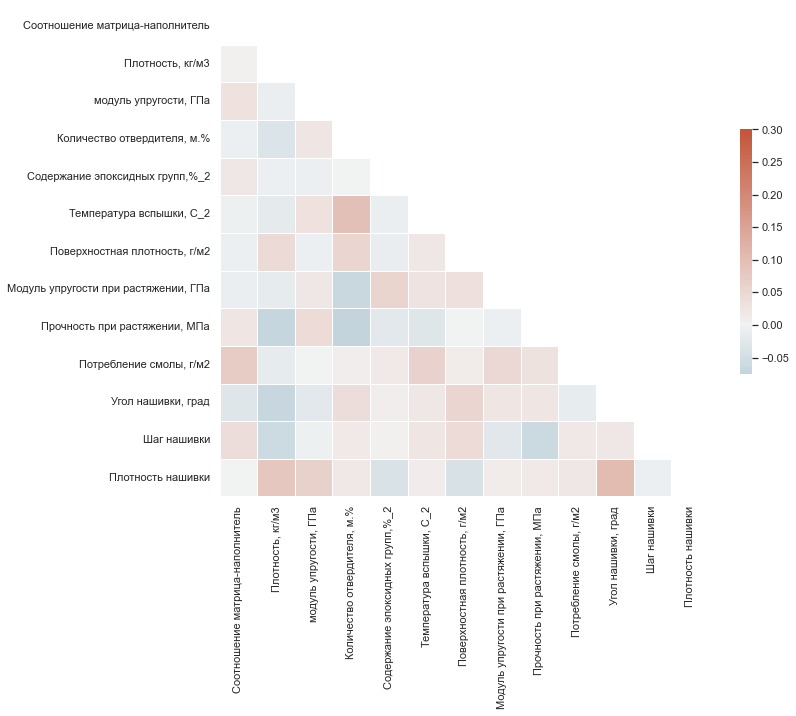

In [30]:
corr_matrix = df.corr()
sns.set(style='white')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Данная матрица является матрицей корреляции между различными характеристиками материала. Коэффициент корреляции - это мера тесноты связи между двумя переменными. Он изменяется от -1 до 1, где 1 означает положительную корреляцию (две переменные движутся в одном направлении), -1 означает отрицательную корреляцию (две переменные движутся в противоположных направлениях), а 0 означает отсутствие связи между переменными.

Из данной матрицы можно сделать следующие выводы:

* Сам корреляционный коэффициент между Соотношением матрица-наполнитель и каждой из других характеристик равен относительно маленьким числам, что свидетельствует о том, что данная переменная слабо коррелирует с остальными характеристиками.

* Модуль упругости, ГПа и Прочность при растяжении, МПа имеют относительно сильную положительную корреляцию (коэффициент корреляции равен 0.043189), что говорит о том, что увеличение одной из этих характеристик обычно сопровождается увеличением другой.

* Плотность нашивки имеет относительно слабую положительную корреляцию с модулем упругости, ГПа (коэффициент корреляции равен 0.063148), что говорит о том, что увеличение одной из этих характеристик обычно слабо связано с увеличением другой.

* Прочность при растяжении, МПа имеет отрицательную корреляцию с Плотностью, кг/м3 (коэффициент корреляции равен -0.069958), что говорит о том, что увеличение плотности обычно сопровождается уменьшением прочности материала при растяжении.

* Плотность, кг/м3 и Угол нашивки, град также имеют отрицательную корреляцию (коэффициент корреляции равен -0.068451), что говорит о том, что увеличение угла нашивки обычно сопровождается уменьшением плотности материала.

* Прочность при растяжении, МПа имеет наиболее значимую положительную корреляцию с Количество отвердителя, м.%, что может говорить о том, что увеличение количества отвердителя может повысить прочность материала при растяжении.

* Потребление смолы, г/м2 имеет положительную корреляцию с Плотностью нашивки, что может указывать на то, что увеличение плотности нашивки может привести к повышению потребления смолы.

* Угол нашивки, град и Шаг нашивки имеют отрицательную корреляцию с Прочностью при растяжении, МПа, что может указывать на то, что увеличение угла и шага нашивки может привести к снижению прочности материала при растяжении.

* Содержание отвердителя оказывает наибольшее влияние на свойства композита. Оно коррелирует отрицательно с модулем упругости при растяжении и прочностью при растяжении и положительно с содержанием эпоксидных групп, температурой вспышки и потреблением смолы.

* Более высокая плотность композита связана с более высоким содержанием отвердителя и более низкой плотностью нашивки.

* Наблюдается небольшое положительное влияние температуры вспышки на содержание эпоксидных групп и небольшое отрицательное влияние на содержание отвердителя.

В целом, корреляционная матрица может помочь в понимании связей между различными свойствами материала и его составляющих элементов, что может помочь в оптимизации процесса производства и улучшения качества материала. Однако, следует помнить, что корреляция не всегда означает причинно-следственную связь, и дополнительные исследования могут потребоваться для подтверждения гипотез.